# Periodic Potential

Finally we want to have a look at a system which is contains periodicity. This is an example, which is relevant for electrons propagating in a perdiodic lattice. In a realistic case, the potential would be formed by a periodic replication of Coulomb potentials at the position of the ions. For simplicity we just introduce a sine function for the potential. The result of this calculation shall be a band structure.

In [1]:
import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# default values for plotting
plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 18,
                     'axes.labelsize': 16,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',}) 

Our periodic potential shall be finite in size and we will simulate that with a sine function. This time, we will not look at realistic length and energy scales, but just take a model function.

Our potential will be like that 

![Periodic Potential](periodic_potential.png)

where we chose the height and period of the sine function.

## Definition of the problem

Before we start, we need to define some quantities:

* we will study this time a domain of $L=4\pi$
* we will use N=3001 positions along $x$
* our potential will be described by $V(x)=A\sin^2(b\cdot x)$
* we will choose $A=30$, $b=3$

In [55]:
L = 4*np.pi
N = 3001
x = np.linspace(-L, L, N)
dx = x[1] - x[0]

### Potential energy

In [61]:
# periodic potential for band structure
U_vec =30*np.cos(3*x)**2

# potential energy is only on the diagonal, no deritvative
U = diags([U_vec], [0])

### Kinetic energy

In [62]:
# T is the finite difference representation of the second derivative in the kinetic energy
T = -0.5*diags([-2., 1., 1.], [0,-1, 1], shape=(N, N))/dx**2

An finally the total Hamilton operator matrix again.

In [63]:
# Sum of kinetic and potential energy
H = T + U

### Solution

In [64]:
# diagonalize the matrix and take the first n eigenvalues and eigenvectors
n=48
vals, vecs = eigsh(H, k=n,which='SM')

### Plotting

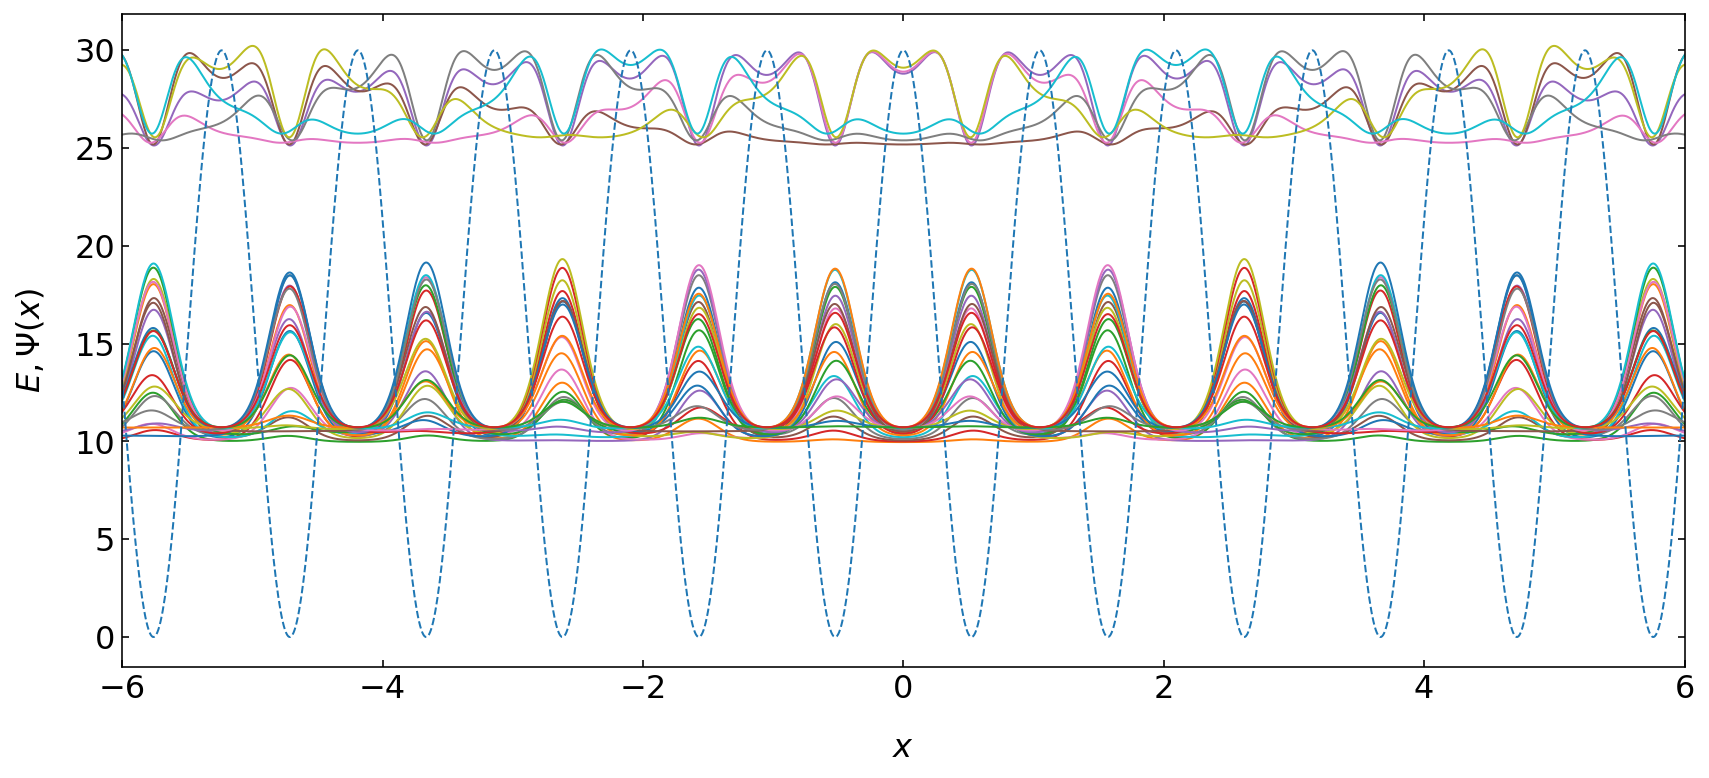

In [75]:
plt.figure(figsize=(14,6))

for k in range(30):
    vec = vecs[:, k]
    mag = np.sqrt(np.dot(vecs[:, k],vecs[:, k]))
    vec = vec/mag
    plt.plot(x, 5000*np.abs(vec)**2+vals[k], label=r"$n=%i$"%k)

    
plt.plot(x,U_vec,'--')
plt.xlabel(r"$x$")
plt.ylabel(r"$E, \Psi(x)$")
plt.xlim([-6,6])
plt.show()

## Energy states

If we plot the energy states as a function of the index of the energy state, we recognize a gap of energy states, which is not accessible by any state. 

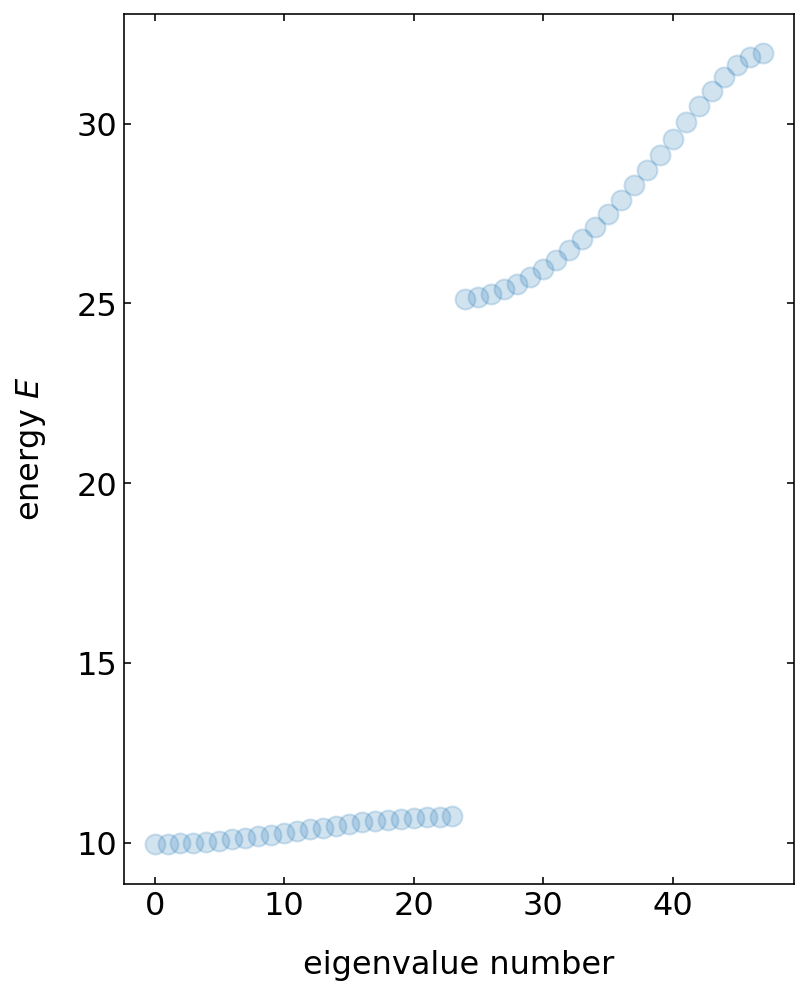

In [95]:
plt.figure(figsize=(6,8))
plt.xlabel('eigenvalue number')
plt.ylabel(r"energy $E$")

plt.plot(vals,'o',alpha=0.2)
plt.show()

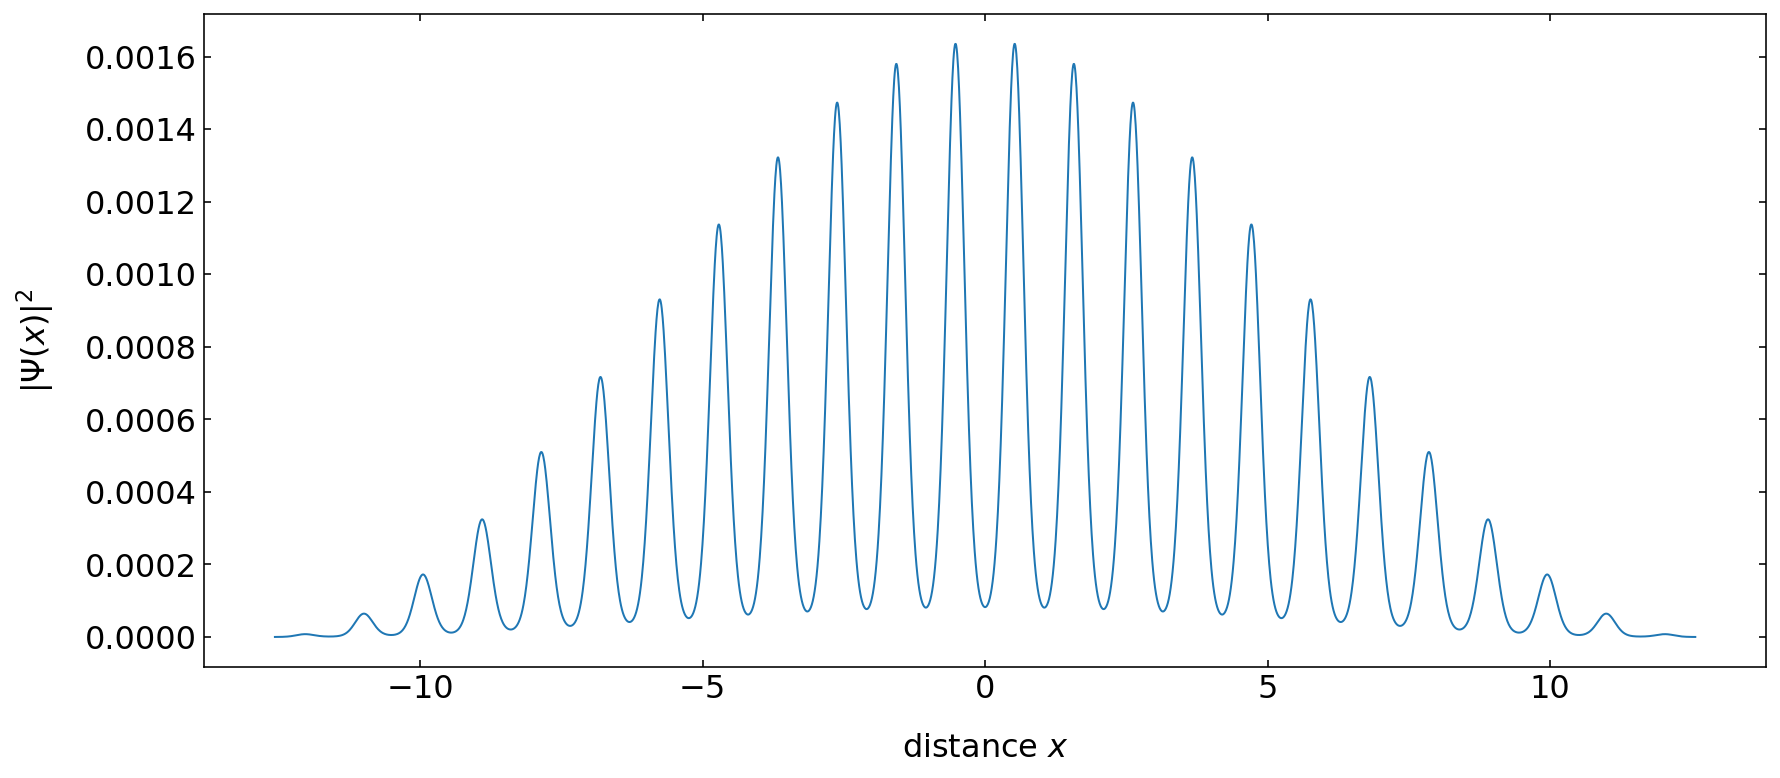

In [102]:
plt.figure(figsize=(14,6))
plt.plot(x,np.abs(vecs[:,0])**2)

plt.xlabel(r"distance $x$")
plt.ylabel(r"$|\Psi(x)|^2$")
plt.show()